**1. Import Data Picture and Library Tensorflow**

In [ ]:
# mengimport library tensorflow dan memastikan versi tensorflow yang digunakan adalah di atas 2.0
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
# mendownload data gambar dalam bentuk file zip 
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-30 07:57:49--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.65MB/s    in 68s     

2021-06-30 07:58:58 (4.51 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstrasi pada file zip rockpaperscissors.zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# mendefinisikan dan mengecek nama direktori untuk data latih dan data validasi
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
os.listdir(base_dir)

['rock', 'scissors', 'paper', 'README_rpc-cv-images.txt']

**2. Data Preprocessing**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# image augmentation dan persiapan porsi pembagian jumlah untuk data training dan data testing
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split = 0.4)   # membagi data_validation sebanyak 40% dari total data

test_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split = 0.4)   # membagi data_validation sebanyak 40% dari total data

In [ ]:
# object image generator dan pembagian direktori data validation dan training
train_generator = train_datagen.flow_from_directory(
        base_dir,  #direktori data 
        target_size = (150,150),  # mengubah seluruh gambar menjadi 150x150 piksel
        subset = 'training')

validation_generator = test_datagen.flow_from_directory(
       base_dir, #direktori data 
       target_size = (150,150),  # mengubah seluruh gambar menjadi 150x150 piksel
       subset = 'validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


**3. Learning Process**

In [ ]:
# membuat aristektur CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation = 'softmax') # using softmax instead of sigmoid because we're using 3 classes                              
])

Pembuatan fungsi callback

In [ ]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}):
    if(logs.get('accuracy') > 0.96 and logs.get('val_accuracy') > 0.96):
      print('\n Reached 96% accuracy')
      self.model.stop_training = True
callbacks = Callback()

Memanggil fungsi compile dan mendefinisikan loss dan optimizer

In [ ]:
# compile model dengan 'adam' optimizer dan loss function 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
# latih model dengan model.fit
simulation = model.fit(
      train_generator,
      steps_per_epoch = 25, # berapa batch yang akan diesksekusi pada setiap epoch
      epochs = 20, # jika akurasi model belum optimal, tingkatkan nilai epochs tersebut
      validation_data = validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps = 5, # berapa batch yang akan dieksekusi pada setiap epoch
      verbose = 2,
      callbacks = [callbacks])


Epoch 1/20
25/25 - 41s - loss: 0.9575 - accuracy: 0.5182 - val_loss: 0.5453 - val_accuracy: 0.8250
Epoch 2/20
25/25 - 40s - loss: 0.5836 - accuracy: 0.7455 - val_loss: 0.3827 - val_accuracy: 0.8625
Epoch 3/20
25/25 - 41s - loss: 0.2767 - accuracy: 0.9137 - val_loss: 0.1772 - val_accuracy: 0.9250
Epoch 4/20
25/25 - 42s - loss: 0.2272 - accuracy: 0.9275 - val_loss: 0.2111 - val_accuracy: 0.9312
Epoch 5/20
25/25 - 40s - loss: 0.2725 - accuracy: 0.9000 - val_loss: 0.3622 - val_accuracy: 0.9000
Epoch 6/20
25/25 - 40s - loss: 0.1408 - accuracy: 0.9623 - val_loss: 0.1753 - val_accuracy: 0.9500
Epoch 7/20
25/25 - 41s - loss: 0.1530 - accuracy: 0.9513 - val_loss: 0.2504 - val_accuracy: 0.9312
Epoch 8/20
25/25 - 41s - loss: 0.1652 - accuracy: 0.9425 - val_loss: 0.1809 - val_accuracy: 0.9375
Epoch 9/20
25/25 - 40s - loss: 0.1417 - accuracy: 0.9558 - val_loss: 0.1729 - val_accuracy: 0.9563
Epoch 10/20
25/25 - 41s - loss: 0.0866 - accuracy: 0.9712 - val_loss: 0.1115 - val_accuracy: 0.9563
Epoch 11/

Evaluasi akurasi dan loss dari suatu model dengan visualisasi plot grafik 

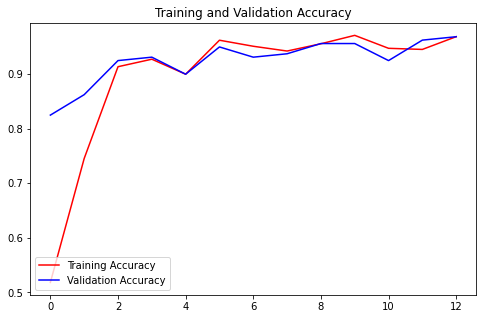

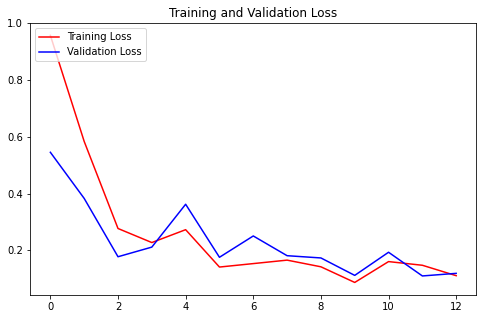

In [ ]:
import matplotlib.pyplot as plt

accuracy = simulation.history['accuracy']
val_accuracy = simulation.history['val_accuracy'] 
loss = simulation.history['loss']
val_loss = simulation.history['val_loss']

epochs_range = range(len(accuracy))

plt.figure(figsize=(8,5))
plt.plot(epochs_range, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower left')
plt.show()

plt.figure(figsize=(8,5))
plt.plot(epochs_range, loss, 'r', label='Training Loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper left')
plt.show()

In [ ]:
print(train_generator.class_indices) # pengecekan nilai output dari tiap class

{'paper': 0, 'rock': 1, 'scissors': 2}


**5. Predicting Images**

Saving S__49447439-removebg-preview.png to S__49447439-removebg-preview (1).png
S__49447439-removebg-preview.png

Prediksi Hasil Gambar
scissors


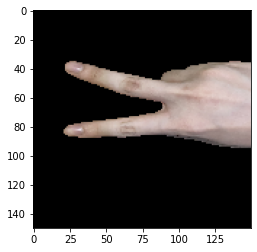

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  output_classes = np.argmax(classes)
  
  print(fn)
  print('\nPrediksi Hasil Gambar')
  if output_classes == 0:
    print('paper')
  elif output_classes == 1:
    print('rock')
  else:
    print('scissors')